In [2]:
from sklearn.datasets import fetch_openml
#from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
import random
import copy
import numpy as np

In [4]:
Xtrain,Xtest,ytrain,ytest = train_test_split(mnist.data,mnist.target,random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1724
           1       0.99      0.98      0.99      1982
           2       0.97      0.96      0.96      1819
           3       0.95      0.96      0.95      1731
           4       0.97      0.97      0.97      1673
           5       0.96      0.97      0.96      1578
           6       0.98      0.97      0.98      1718
           7       0.96      0.97      0.96      1817
           8       0.96      0.95      0.96      1720
           9       0.95      0.94      0.94      1738

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [71]:
def test_f(func,draw=0,start=1,done=784):
    global mnist
    test_lis=[]
    correctness=[]
    for test in range(start,done):
        count=0
        count_error=0
        while count<100:
            i=random.randint(0,69999)
            change_lis=[]
            while len(change_lis)<test:
                rand=random.randint(0,63)
                if not (rand in change_lis):
                    change_lis.append(rand)
                #print(change_lis)
            count+=1
            save=copy.deepcopy(mnist.data[i])
            #print(save)
            for change_ele in change_lis:
                save=func(change_ele,save)
            yp=model.predict([save])
            yp_ori=model.predict([mnist.data[i]])
            if yp[0]!=mnist.target[i]:# and yp_ori==mnist.target[i]:
                count_error+=1
                if draw:
                    fig = plt.figure(figsize=(4,4)) # figure size in inches
                    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
                    ax = fig.add_subplot(1,2,1,xticks=[],yticks=[])
                    ax_o=fig.add_subplot(1,2,2,xticks=[],yticks=[])
                    ax.imshow(save.reshape(28,28),cmap=plt.cm.binary,interpolation='nearest')
                    ax_o.imshow(mnist.data[i].reshape(28,28),cmap=plt.cm.binary,interpolation='nearest')
                    # label the image with the target value
                    ax.text(0,7,str(mnist.target[i]))
                    print(yp[0],i)
                    plt.show()
            
            #print(digits.data[i])
        test_lis.append(copy.deepcopy(test))
        correctness.append(count_error/count)
    return test_lis,correctness

In [39]:
def test_0(n,pic):
    return pic
test_lis,correctness=test_f(test_0,1,done=2)

5 67713


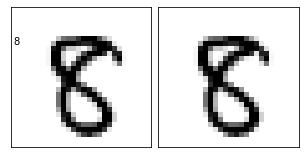

9 24662


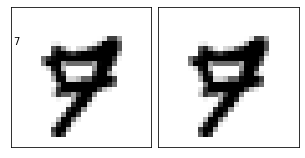

9 58775


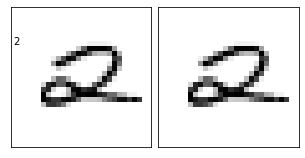

5 61014


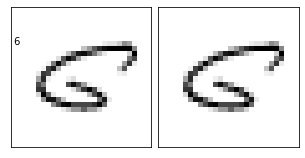

4 49012


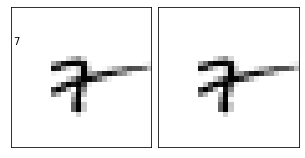

4 32878


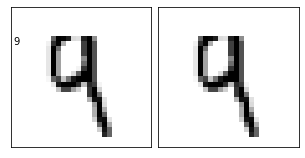

9 62130


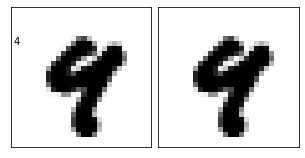

0 18739


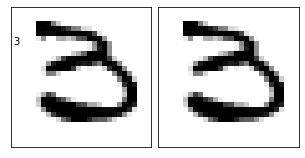

5 61014


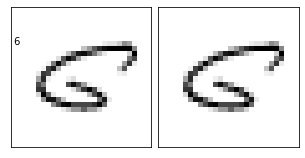

9 29041


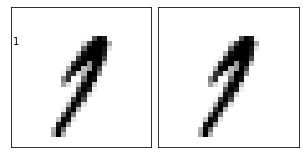

5 28152


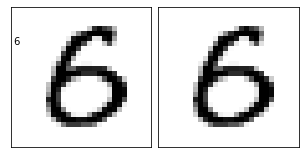

6 40280


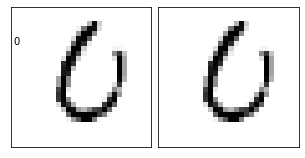

2 20798


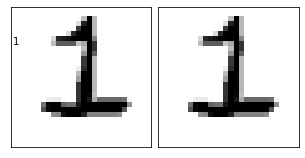

2 41998


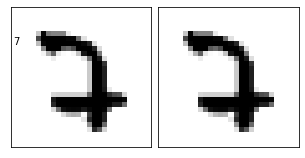

4 37352


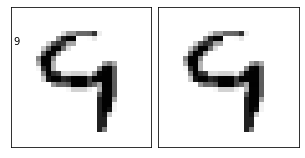

8 47946


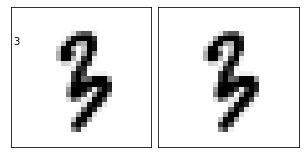

7 29061


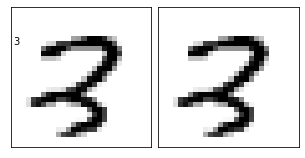

5 37134


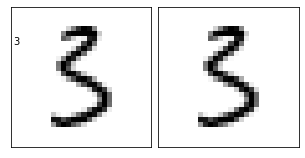

0 52727


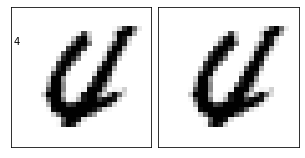

5 30884


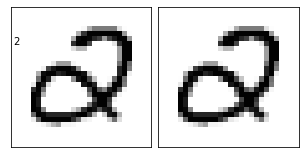

In [60]:
def test_1(n,pic):
    pic[n]=0
    return pic
test_lis,correctness=test_f(test_1,1,done=25)

1 32202


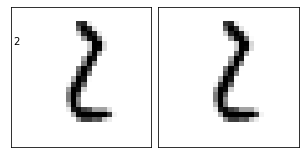

In [59]:
def test_2(n,pic):
    pic[n]=int(random.randint(500,1500)*pic[n]/1000)
    return pic
test_lis,correctness=test_f(test_2,1,start=50,done=51)

5 13318


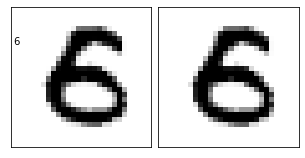

In [57]:
def test_3(n,pic):
    cross=[n+1,n-1,n+28,n-28,n+29,n-29,n+27,n-27,n+2,n-2,n+56,n-56]
    for ele in cross:
        try:
            pic[ele]=pic[n]
        except:
            continue
    return pic
test_lis,correctness=test_f(test_3,1,start=50,done=51)

1 15610


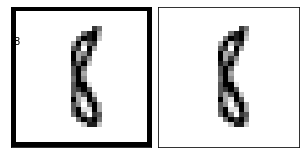

In [54]:
def test_4(n,pic):
    i=0
    while i<784:
        if i<29 or i>755 or i%28==0 or i%28==27:
            pic[i]=255
        i+=1
    return pic
test_lis,correctness=test_f(test_4,1,done=2)

9 16240


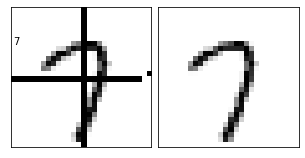

6 5194


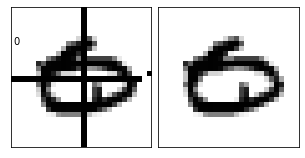

9 57280


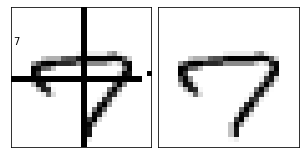

In [68]:
def test_5(n,pic):
    i=0
    while i<784:
        if 390<i<418 or i%28==14:
            pic[i]=255
        i+=1
    return pic
test_lis,correctness=test_f(test_5,1,done=2)
#3% get wrong

4 15276


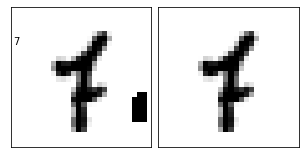

In [73]:
def test_6(n,pic):
    i=0
    while i<784:
        if 500<i<650 and 23<i%28<27:
            pic[i]=255
        i+=1
    return pic
test_lis,correctness=test_f(test_6,1,done=2)

In [69]:
print(dict(zip(test_lis,correctness)))

{1: 0.03}
